<a href="https://colab.research.google.com/github/Robert-Ph/Computer-Vision/blob/main/Adaptive_Thresholding_Moving_Averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# cách 1: sử dụng tính toán trung bình thủ công
def ThresholdAver(img_gray, c, size):
  img_padding = np.pad(img_gray,((0,0),( 0,size-1)))
  row, col = img_gray.shape
  out = img_gray
  for i in range(row):
    for j in range(col):
      M = img_padding[i: i + 1, j:j + size]
      T = c*np.mean(M)
      if out[i][j] > T:
          out[i][j] = 255
      else:
          out[i][j] = 0

  return out


In [13]:
# cách 2: cải tiến thuật toán tính trung bình(tính toán nhanh hơn cách tính thủ công)
# dữ liệu array kiểu integer
def ThresholdAverTypeInt(img_gray, c, size):
  img_padding = np.pad(img_gray,((0,0),( 0,size-1)), mode = 'symmetric')
  row, col = img_gray.shape
  out = img_gray

  for i in range(row):
    S = img_padding[i, 0:size]
    m = np.mean(S)
    for j in range(1, col):
      m = m + (int(img_padding[i, size+j-1]) - int(img_padding[i, j-1]))/size
      T = c*m

      if out[i][j] > T:
          out[i][j] = 255
      else:
          out[i][j] = 0

  return out


In [17]:
# cách 2: cải tiến thuật toán tính trung bình(tính toán nhanh hơn cách tính thủ công)
# dữ liệu array kiểu float
def ThresholdAverTypeFloat(img_gray, c, size):
  img_padding = np.pad(img_gray,((0,0),( 0,size-1)), mode = 'symmetric').astype(float)
  row, col = img_gray.shape
  out = img_gray

  for i in range(row):
    S = img_padding[i, 0:size]
    m = np.mean(S)
    for j in range(1, col):
      m = m + (float(img_padding[i, size+j-1]) - float(img_padding[i, j-1]))/size
      T = c*m

      if out[i][j] > T:
          out[i][j] = 255
      else:
          out[i][j] = 0

  return out

<class 'numpy.ndarray'>
Ảnh Gốc


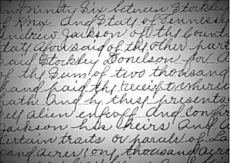


Ảnh Phân Đoạn theo ngưỡng thích nghi


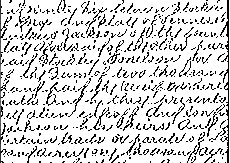

In [18]:
file = '/content/Screenshot 2024-05-25 165510.png'
img = cv.imread(file, 0)
c= 0.9
size =3
print(type(img))
print("Ảnh Gốc")
cv2_imshow(img)

out = ThresholdAverTypeFloat(img, c, size)
print()
print("Ảnh Phân Đoạn theo ngưỡng thích nghi")
cv2_imshow(out)